**PesudoInverse** **Ax = b**

finding weight using least square method

In [ ]:
#inverse Ax = b

import numpy as np
a = np.array([[10, 8, -3, 1],
              [8, 10, -3, 1],
              [3, 3, -1, 1],
              [1, 1, -1, 0]])
b = np.array([1, 1, -1, 0])
t = np.transpose(a)
c = t.dot(a)
inverse = np.linalg.inv(c) #inverse

#next part 
next_part = t.dot(b)
final_part = inverse.dot(next_part)
print(final_part)


#if you use this code for svm the last element of the output is w0 (basis weight) so we ignore it to find weight
#but we use to find for margin if go with hyperplane w^Tx+w0

**Week 1 Introduction**

Draw a confusion matrix for this data.


              precision    recall  f1-score   support

        Zero     0.3333    0.5000    0.4000         2
         One     0.7500    0.6000    0.6667         5
         Two     1.0000    1.0000    1.0000         1

    accuracy                         0.6250         8
   macro avg     0.6944    0.7000    0.6889         8
weighted avg     0.6771    0.6250    0.6417         8


Overall 	 Precision 	 Recall 	 F1 Score
		 0.6250 	 0.6250 	 0.6250
Close figure to terminate.


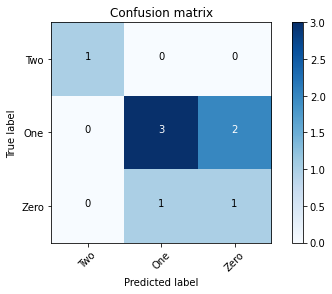

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score


def basic_metrics(y_true, y_pred, class_names, avg, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm[:,::-1][::-1]
    np.set_printoptions(precision=4)
    
    title='Confusion matrix'
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print(classification_report(y_true, y_pred, target_names=class_names[::-1],digits=4))
    print()
    print("Overall", "\t", "Precision", "\t", "Recall","\t", "F1 Score")
    print("\t\t","{:.4f}".format(precision_score(y_true,y_pred,average=avg)),"\t", 
          "{:.4f}".format(recall_score(y_true,y_pred,average=avg)), "\t",  "{:.4f}".format(f1_score(y_true,y_pred,average=avg)))
    print("Close figure to terminate.")
    plt.show()

def main():
    # Both Binary and multi classification works here (Choose average = binary for binary classification)
    class_names = np.array(["Two","One", "Zero"]) #Name of classes in descending order
    y_true = [1,1,0,1,0,1,1,2] #True value of class labels 
    y_pred = [1,0,1,1,0,1,0,2] #Predicted value of class labels
    average = 'micro' # Choose average parameter for overall metrics (binary, micro, macro, weighted)
    basic_metrics(y_true, y_pred, class_names,average)

if __name__ == "__main__":
    main()


#output is one row 
#for matrix it's 2by2 from one row which is from last two lost column

## Widrow-Hoff

In [26]:
def widrow_hoff_accuracy(X_t, Y, at):
    correct = 0
    for i in range(len(Y)):
        true_label = Y[i, 0]

        y = np.concatenate((np.array([1]), X_t[i]))
        y = y.reshape(len(y), 1)

        # calculate ay
        ay = np.dot(at, y)

        if ay > 0: predicted_label = 1
        else: predicted_label = -1

        if predicted_label == true_label:
            correct += 1

    return correct/len(Y)

def seq_widrow_hoff(X, Y, at, bt, lr, iterations):
    result = []
    for o in range(int(iterations / len(Y))):
        for i in range(len(Y)):
            at_prev = at
            y = np.concatenate((np.array([1]), X[i]))
            if Y[i] < 0:
                y = y * -1
            y = y.reshape(len(y), 1)

            # calculate ay
            ay = np.dot(at, y).round(4)

            # calculate update part
            update = (bt[0, i] - ay).round(4)
            update = (lr * update).round(4)
            update = (update * y.transpose()).round(4)

            # add update part to a
            at = np.add(at, update).round(4)

            # append result
            result.append((str(i + 1 + (len(Y) * o)), np.round(at_prev, 4), bt[0, i],
                           np.round(y.transpose(), 4), np.round(ay, 4), np.round(at, 4)))
            
    return result, ay, at

In [ ]:
#Widrow-Hoff
X_t = np.array([[0.0, 2.0],
                [1.0, 2.0],
                [2.0, 1.0],
                [-3.0, 1.0],
                [-2.0, -1.0],
                [-3.0, -2.0]])

Y = np.array([[1, 1, 1, -1, -1, -1]]).transpose()  #output class


at = np.array([[1.0, 0.0, 0.0]])  # initial param weights
bt = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])  # margin vector
lr = 0.1  # learning rate
epochs = 2
iterations = epochs * len(X_t)

result, ay, at_new = seq_widrow_hoff(X_t, Y, at, bt, lr, iterations)


# Print results
# -----------------------------------------------------------
pt = PrettyTable(('iteration', 'at', 'b', 'y_trans', 'at.y', 'at_new'))
for row in result: pt.add_row(row)

pt.align['iteration'] = 'c'
pt.align['at'] = 'l'
pt.align['b'] = 'l'
pt.align['y_trans'] = 'l'
pt.align['at.y'] = 'l'
pt.align['at_new'] = 'l'

print(pt)

**WEEK 2**


Question 5

In augmented feature space, a dichotomizer is defined using the following linear discriminant function g(x) = a^ty  and y is y^t = (1, x) where x is the input vector and 1 is augmented.

Normally threshold is zero anything greater than zero class 1 otherwise class 2

In [20]:
import numpy as np
#weights with bias and w1 w2...
at=np.array([-3, 1, 2, 2, 2, 4])  
#input vector x
x1=np.array([1, 0, -1, 0, 0, 1]).T  #1 infront in the vector is augmented 
#input vector 
x2=np.array([1, 1, 1, 1, 1, 1]).T #1 infront in the vector is augmented

print(np.dot(at,x1),  '\n')
print(np.dot(at,x2), '\n')

-1 

8 



**Question 6:** 
<br>
A Linear Discriminant Function is used to define a Dichotomizer, such that x is assigned to class 1 if g(x) > 0,
and x is assigned to class 2 otherwise. Use the Batch Perceptron Learning Algorithm (with augmented notation
and sample normalisation), to find appropriate parameters for the linear discriminant function, when the data set
is as shown.

In [ ]:
#no change in weight sign. same as in the question but sample normalisation with sign
#if output class is negative [4, 1] ---> [-1, -4, -1]

import numpy as np 
from prettytable import PrettyTable
from sklearn import datasets

# ------------------------------------------------------------------------------------
# Given Parameters in Question:
a = [-25, 6, 3]         # Initial a
n = 1                   # Learning Rate

# Given Dataset:
X = [[1, 5], [2, 5], [4, 1], [5, 1]]
Y = [1, 1, 2, 2]


# ------------------------------------------------------------------------------------
# Applying Sample Normalisation:
Norm_Y = []

for x, y in zip(X, Y):
    
    # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
    if y == 2 or y == -1:
        x = [i * -1 for i in x]
        x.insert(0, -1)
        Norm_Y.append(x)
    else:
        x.insert(0, 1)
        Norm_Y.append(x)

print("Vectors used in Batch Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))

# ------------------------------------------------------------------------------------
# Batch Perceptron Learning Algorithm:

epoch = 1
result=[]
while True:

    updating_samples = []
    print("Epoch {}".format(epoch))

    for count, i in enumerate(range(len(Norm_Y))):
    
        # Knowing which value of a to use. If it is the first iteration, than use the given parameters in the 
        # question:
        a_prev = a
        #print("The value of a used is {}".format(a_prev))
        y_input = Norm_Y[i]
        #print("y Value used for this iteration is: {}".format(y_input))

        # Equation -> g(x) = a^{t}y
        ay = np.dot(a, y_input)
        #print("The value of a^t*y for this iteration is: {}".format(ay))
        

        result.append((a_prev, ay, ay <= 0))

        # Checking if the sample is misclassified or not:
        
        # If sample is misclassified:
        if ay <= 0:

            # If this is the first sample in the epoch, add the previous value of a to the list of samples used 
            # for the update to perform summation at the end of the epoch:
            if count == 0:
                #print("This sample is misclassified. This sample will be used in update.\n")
                updating_samples.append(np.array(a))
                updating_samples.append(np.array(y_input))
            
            # If sample is misclassified and IS NOT the first sample in the epoch:
            else:
                #print("This sample is misclassified. This sample will be used in update.\n")
                updating_samples.append(np.array(y_input))
        
        # If sample is classified correctly:
        else: 

            # If first sample in the epoch, append the previous value of a to the updating samples list:
            if count == 0:
                updating_samples.append(np.array(a))
                

    # Calculating new value of a after having gone through all of the samples in the dataset since it is Batch Learning.
    a_update_val = n * sum(updating_samples)

    # If Block to check whether learning has converged. If we have gone through all the data without needing 
    # to update the parameters, we can conclude that learning has converged.
    if len(updating_samples) <= 1:
        print("\nLearning has converged.")
        print("Required parameters of a are (intial weights): {}".format(a))
        break

    # Updating a using our new value of a:
    a = a_update_val
    print("\nNew Value of a^t updated weights for next iteration is: {}.\n".format(a))

    epoch += 1


pt = PrettyTable(('x', 'g(x)=ay', 'gx=<0'))
for row in result: pt.add_row(row)

pt.align['iteration'] = 'c'
pt.align['a'] = 'l'
pt.align['y'] = 'l'
pt.align['ay'] = 'l'
pt.align['a_new'] = 'l'

print(pt)

**Question 7**

Repeat the previous question using the Sequential Perceptron Learning Algorithm (with augmented notation
and sample normalisation).

In [ ]:
##no change in weight sign. same as in the question but sample normalisation with sign
#if output class is negative [4, 1] ---> [-1, -4, -1]

# Sequential Perceptron Learning Algorithm

# INPUTS:
    # x: data
    # y: target
    # a: initial weights
    # eta: learning rate
    # n_epochs: number of epochs of learning on the entire dataset
    # augmentation: True if data is augmented
    # sample_normalisation: True if sample normalisation applied

def sequential_perceptron_learning(x, y, a, eta, n_epochs, augmentation, sample_normalisation):
    n_instances = len(x)
    
    if augmentation:
        x = np.insert(x, 0, 1, axis=1)
    
    if sample_normalisation: # CAREFUL WITH THE DATA LABEL
        x[y==-1] = -x[y==-1]
    
    if sample_normalisation:
        for n in range(n_epochs):
            print("Epoch #{}: ".format(n+1))
            for i in range(n_instances):
                if np.sign(np.dot(a, x[i])) <= 0: # only misclassified samples
                    a += eta*x[i]
                print("Sample #{}: {}".format(i+1, a))
            print("End of epoch #{}\n".format(n+1))


    else:
        for n in range(n_epochs):
            print("Epoch #{}: ".format(n+1))
            for i in range(n_instances):
                if np.sign(np.dot(a, x[i])) != y[i]: # only misclassified samples
                    a += eta*y[i]*x[i]
                print("Sample #{}: {}".format(i+1, a))
            print("End of epoch #{}\n".format(n+1))

    return a
    
    #Using Augmented notation and sample normalisation, dataset is: which means
    #we add 1 input vector x and adding minus to all elements in vectors depending on y output class
    #depending on the output class postitive/negative or class 1 or 2

# Tutorial example (exercise 7)
x = np.array([[1, 5], [2, 5], [4, 1], [5, 1]]) # data
y = np.array([1, 1, -1, -1]) # targets
a = np.array([-25, 6, 3]) # initial weights

# And here we estimate the new vector
a = sequential_perceptron_learning(x, y, a, 1, 3, True, True)
print(a) 

##Sequential Perceptron Learning Algorithm
**Question 10** with sample normalisation
using the sample normalisation method of implementing the Sequential Perceptron Learning Algorithm.


In [ ]:
#change in weight sign.
#if output class is negative -1 or class 2 with input [-3, 1] ---> [-1, -3, -1]
#[-3, -2] ---> [-1, 3, 2]

import numpy as np

# ------------------------------------------------------------------------------------
# Given Parameters in Question:

a = [1, 0, 0]         # Initial a where a is the weight row vector and front one is bias weight 
n = 1                 # Learning Rate

# X input vector 

X = [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]]  
Y = [1, 1, 1, -1, -1, -1]    #output class

# ------------------------------------------------------------------------------------
# Applying Sample Normalisation:
Norm_Y = []

for x, y in zip(X, Y):
    
    # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
    if y == -1 or y == 2:
        x = [i * -1 for i in x]
        x.insert(0, -1)
        Norm_Y.append(x)
    else:
        x.insert(0, 1)
        Norm_Y.append(x)

print("Vectors used in Sequential Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))


# ------------------------------------------------------------------------------------
# Sequential Perceptron Learning Algorithm:

epoch = 1
result=[]
while True:

    updating_samples = []
    print("Epoch {}".format(epoch))

    # Keeping track of how many samples are correctly classified. If this variable reaches 
    # the value that is equal to the size of the dataset (len), than we know that learning 
    # has converged:
    correctly_classified_counter = 0

    # Going through all of the samples in the dataset one-by-one:
    for i in range(len(Norm_Y)):
    
        # This chooses which weight to use for an iteration. If first iteration, uses given starting weight 
        # as described in question:
        a_prev = a
        
        # Selecting sample to use:
        y_input = Norm_Y[i]

        # Equation -> g(x) = a^{t}y
        ay = np.dot(a, y_input)
        

        # Checking if the sample is misclassified or not:
        
        # If sample is misclassified:
        if ay <= 0:

            #print("This sample is misclassified. This sample will be used in update.\n")
            updating_samples.append(np.array(a))
            updating_samples.append(np.array(y_input))

            # Calculating new value of a using update rule for Sequential Perceptron Learning Algorithm:
            a_update_val = n * sum(updating_samples)



            a = a_update_val
            print("\nNew Value of a^t is: {}.\n".format(a))
        
        # If the sample is correctly classified:
        else: 
            #print("This sample is classified correctly.\n")
            correctly_classified_counter += 1
            pass
            
        # Reset sample to add for update to occur:
        updating_samples = []

        result.append((a_prev, ay, a))

    # If Block to check whether learning has converged. If we have gone through all the data without needing 
    # to update the parameters, we can conclude that learning has converged.
    if correctly_classified_counter == len(Norm_Y):
        #print("\nLearning has converged.")
        print("Required parameters of a are: {}.".format(a))
        break
 
    epoch += 1


pt = PrettyTable(('x', 'g(x)=ay', 'a_new'))
for row in result: pt.add_row(row)

pt.align['iteration'] = 'c'
pt.align['a'] = 'l'
pt.align['y'] = 'l'
pt.align['ay'] = 'l'
pt.align['a_new'] = 'l'

print(pt)

#first line of the output above epoch 1 is the y^t column which is the augmented and X^t normalised

##pesudoinverse

In [72]:
import numpy as np

# ------------------------------------------------------------------------------------
# Given parameters:
#b = np.array([2,2,2,1,1,1]
#margin vector
b = np.array([1]*6) # margin

# Given Dataset:

# Add dataset as given in question. This is assuming that Sample Normalisation has NOT been applied:
X = [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]]
Y = [1, 1, 1, -1, -1, -1]

# ------------------------------------------------------------------------------------
# Applying Sample Normalisation:
Norm_Y = []

for x, y in zip(X, Y):
    
    # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
    if y == -1 or y == 2:
        x = [i * -1 for i in x]
        x.insert(0, y)
        Norm_Y.append(x)
    else:
        x.insert(0, y)
        Norm_Y.append(x)

print("Vectors used in Pseudoinverse operation to calculate parameters of linear discriminant function:\n {}\n".format(Norm_Y))

# ------------------------------------------------------------------------------------
# Initialising Y Matrix:
Y_matrix = []

# Adding each normalised sample in dataset to Y Matrix:
for i in range(len(Norm_Y)):
    Y_matrix.append(Norm_Y[i])
Y_matrix = np.array(Y_matrix)
print("y Matrix being used:\n {}\n".format(Y_matrix))

# Calculating pseudo-inverse of Y Matrix:
pseudo_inv_matrix = np.linalg.pinv(Y_matrix)
print("Pseudo-inverse Matrix is:\n {}\n".format(pseudo_inv_matrix))

# Multiplying Pseudo-inverse matrix by given margin vector in question:
a = np.dot(pseudo_inv_matrix, b)
print("a is equal to:\n {}\n".format(a))

correct_classification = 0

# Checking if classifications are correct:

for sample in Norm_Y:
    ay = np.dot(sample, a)
    print("\ng(x) for sample {} is {}".format(sample, ay))

    # Sample is correctly classified if ay is positive:    
    if ay > 0:
        print("Sample has been correctly classified.")
        correct_classification += 1

if correct_classification == len(Norm_Y):
    print("\nAll samples are classified correctly which means that discriminant function parameters are correct.")

else:
    print("\nSome samples are misclassified.")

# ------------------------------------------------------------------------------------

Vectors used in Pseudoinverse operation to calculate parameters of linear discriminant function:
 [[1, 0, 2], [1, 1, 2], [1, 2, 1], [-1, 3, -1], [-1, 2, 1], [-1, 3, 2]]

y Matrix being used:
 [[ 1  0  2]
 [ 1  1  2]
 [ 1  2  1]
 [-1  3 -1]
 [-1  2  1]
 [-1  3  2]]

Pseudo-inverse Matrix is:
 [[ 0.06818182  0.16477273  0.38068182  0.10227273 -0.23295455 -0.25568182]
 [-0.03409091  0.04261364  0.18465909  0.19886364 -0.00852273  0.00284091]
 [ 0.14015152  0.07481061 -0.12026515 -0.20643939  0.11837121  0.18276515]]

a is equal to:
 [0.22727273 0.38636364 0.18939394]


g(x) for sample [1, 0, 2] is 0.6060606060606065
Sample has been correctly classified.

g(x) for sample [1, 1, 2] is 0.9924242424242433
Sample has been correctly classified.

g(x) for sample [1, 2, 1] is 1.1893939393939406
Sample has been correctly classified.

g(x) for sample [-1, 3, -1] is 0.7424242424242435
Sample has been correctly classified.

g(x) for sample [-1, 2, 1] is 0.7348484848484861
Sample has been correctly cl

##Question 11

##Sequential Multiclass Perceptron
Learning algorithm to find the parameters for three linear discriminant functions that will correctly classify this
data. Assume initial values for all parameters are zero, and use a learning rate of 1. If more than one discriminant
function produces the maximum output, choose the function with the highest index (i.e., the one that represents
the largest class label).

In [ ]:
# Discriminant Functions [week 2]
import numpy as np

def sequential_multiclass_perceptron_learning (N, augmented_matrix, eta, omega, number_of_classes, number_of_features ):
  # N is the number of exemplars provided in the question
  # augmented_matrix is the augmented feature vector from the question
  # eta is the learning rate given in the question
  # omega is an array containing all the output classes of the feature vectors

  N_counter = 0 # counter which keeps track of cases where winner_class == omega[index]

  #Step 2. Initialise aj for each class
  at = np.zeros((number_of_classes, number_of_features))

  for i in range(0,15):
    print ('Iteration: ',i+1)
    # Step 3. Find values of g1, g2 and g3 and then select the arg max of g
    index = i % 5

    #Print updated a^t value
    print('a^t:')
    print(at)
    
    # Compute g value
    g = np.empty([number_of_classes])
    for i in range(len(g)):
      print('Calculation of g values..........')
      print('a^t is:',at[i])
      print('Index is:', index)
      print('Aug y^t:', augmented_matrix[:,index] )
      g[i] = at[i] @ augmented_matrix[:,index]


    print('g1 | g2 | g3')
    print(g)

    #Step 4. Select the winner
    #Logic for 0,0,0 case and similar ones where 2 gs can produce max value
    seen = []
    bRepeated = False
    # Check if there are multiple max values, and assign the winner class accordingly
    for number in g:
        if number in seen:
          bRepeated = True
          print ("Number repeated!")
          m = max(g)
          temp = [index for index, j in enumerate(g) if j == m]
          winner_class = max(temp) + 1
        else:
            seen.append(number)
    #If all g values are unique, simply select the max value's class as the winner
    if(bRepeated == False):
      g = g.tolist()
      arg_max = max(g)
      winner_class = g.index(arg_max) + 1
    
    print('Winner class = ', winner_class, ', and actual class is:',omega[index])

    #Compare winnner to actual class 
    if(winner_class != omega[index]):
      # Step 4. Apply the update rule as per the algorithm 
      
      #Increment the actual class value which is incorrectly classified 
      at[omega[index]-1] = at[omega[index]-1] + eta * augmented_matrix[:,index]
      print('New loser value:', at[omega[index]-1])

      #Penalize the wrongly predicted Winner class
      at[winner_class-1] = at[winner_class-1] - eta * augmented_matrix[:,index]
      print('New winner value:', at[winner_class-1])

      #Reset counter to 0
      N_counter =0
    else:
      print ('No update is performed!')
      N_counter +=1 #Increment convergence counter which keeps track of cases where winner_class == omega[index]
      if(N_counter == N): ## check for convergence
        print('Value of N = ', N)
        print('Value of N_counter = ', N_counter)
        print('Learning has converged, so stopping...')
        print ('Final values of a^t after update....')
        print('at')
        print(at)
        break
      print ('N counter value = ', N_counter)
    print('at')
    print(at)
    print ('=========================================================')

if __name__ == "__main__":
    #Set input variables for the sequential_multiclass_perceptron_learning function
    N = 5 # N refers to the number of exemplars in the input dataset
    eta = 1
    input_array = np.array([[ 1,  1,  1,  1],
                           [ 2,  0, -1, -1],
                           [ 0,  2,  1, -1]]) # Input matrix from the question
    augmented_matrix = np.insert(input_array,0,1,axis=1)
    omega = np.array([1,1,2,2,3]) # Class labels from the question 
    number_of_classes = 3
    number_of_features = 3

    #Call function
    sequential_multiclass_perceptron_learning (N, augmented_matrix, eta, omega, number_of_classes, number_of_features)

##Week 3

**Question 2**
<br>
 A neuron has a transfer function which is a linear weighted sum of its inputs and an activation function that
is the Heaviside function. If the weights are w

In [ ]:
#heaviside funtion
import numpy as np

#weights with bias and w1 w2...
weight =np.array([0.1, -0.5, 0.4])  
#input vector x
x1=np.array([0.1, -0.5, 0.4]).T  #1 infront in the vector is augmented 
#input vector 
x2=np.array([0.1, 0.5, 0.4]).T #1 infront in the vector is augmented

print(np.dot(at,x1),  '\n')
print(np.dot(at,x2), '\n')

#once output generated it needs to classify it's class by the threshold set in the question

**Question 3**
<br>
A Linear Threshold Unit. Apply the sequential Delta learning rule so that the output of this neuron

here weight threshold theta (bias) sign change to negative

In [ ]:
#if intiial weights of theta = 0.5 and w1 = 2 using augmentation-----> [-0.5, 2]
import numpy as np
import pandas as pd

from sklearn import datasets
from prettytable import PrettyTable

def heaviside_half(x):
    if x < 0: return 0
    if x == 0: return 0.5
    if x > 0: return 1


def seq_delta_learning(X, Y, w, lr, iterations):
    result = []
    for o in range(int(iterations / len(Y))):
        for i in range(len(Y)):
            w_prev = w
            x = np.concatenate((np.array([1]), X[i]))
            t = Y[i]
            
            wx = np.dot(w, x)
            y = heaviside_half(wx)
            t_y = t - y
            
            update = lr * (t_y) * x
            w = w + update

            # append result
            result.append((str(i + 1 + (len(Y) * o)), x, t, np.round(w_prev, 4),
                           wx.round(4), y, t_y, update.round(4), w.round(4)))

    return result, w

def delta_learning_accuracy(X, Y, w):
    n = len(Y)
    true_count = 0
    for i in range(n):
        x = np.concatenate((np.array([1]), X[i]))
        t = Y[i]

        wx = np.dot(w, x)
        y = heaviside_half(wx)
        
        if t == y:
            true_count += 1
            
    return (true_count/n)

# feature vector
X = np.array([[0.0, 0.0],
              [0.0, 0.1],
              [1.0, 0.0],
              [1.0, 1.0]])
#output class
Y = np.array([0, 0, 0, 1])
#weights
w = np.array([0.5, 1, 1]) 
lr = 1
epochs = 5
iterations = epochs * len(X)

result, w_new = seq_delta_learning(X, Y, w, lr, iterations)


# prettytable
# -----------------------------------------------------------
pt = PrettyTable(('iteration', 'x', 't', 'w', 'wx', 'y=H(wx)', 't-y', 'update', 'w_new'))
for row in result: pt.add_row(row)

pt.align['iteration'] = 'c'
pt.align['x'] = 'l'
pt.align['t'] = 'r'
pt.align['w'] = 'l'
pt.align['wx'] = 'l'
pt.align['y=H(wx)'] = 'r'
pt.align['t-y'] = 'r'
pt.align['update'] = 'l'
pt.align['w_new'] = 'l'

print(pt)

**Question 4**

Repeat the above question using the batch Delta learning rule.
Same as above for augemnted weight sign infront 


In [ ]:
import numpy as np
from prettytable import PrettyTable
class Perceptron:
    def __init__(self):
        self.weights=[]

    #activation function
    def activation(self,data):
        #initializing with threshold value
        activation_val=self.weights[0]
        activation_val+=np.dot(self.weights[1:],data)
        val=0
        if activation_val>0: 
          val=1
        elif activation_val==0:
          val=0.5
        else: 
          val=0
        return val
        #return 1 if activation_val>=0 else 0

    def fit(self,X,y,lrate, epochs, weights):
        #initializing weight vector
        self.weights=weights
        #no.of iterations to train the neural network
        result = []
        batchweights=weights
        for epoch in range(epochs):
            diffs=[]
            for index in range(len(X)):
                w_old=self.weights.copy()
                x=X[index]
                xt = np.concatenate(([1], x))
                predicted=self.activation(x)
                #check for misclassification
                if (Y[index]==predicted):
                    pass
                else:
                    #calculate the error value
                    error=Y[index]-predicted
                    #updation of threshold
                        
                    diffs.append(np.array(lrate*(Y[index]-predicted)*xt))

                result.append((str((index+1)+(epoch)*len(X)), Y[index], np.round(w_old, 4), predicted, Y[index]-predicted, lrate*(Y[index]-predicted)*xt, np.round(self.weights, 4)))
            diff=np.zeros(2)

            for j in range(len(diffs)):
              diff=diff+diffs[j]  
            print('total weight', diff)
            batchweights=batchweights+np.array(diff)
            print('epoch', epoch,':', batchweights)
            self.weights=batchweights

        pt = PrettyTable(('iteration', 't', 'w_old', 'H(wx)', 't-y', "η(t−y)x", 'w_new'))
        for row in result: pt.add_row(row)

        pt.align['iteration'] = 'c'
        pt.align['t'] = 'l'
        pt.align['w_old'] = 'l'
        pt.align['H(wx)'] = 'l'
        pt.align['t-y'] = 'l'
        pt.align['η(t−y)x'] = 'l'
        pt.align['w_new'] = 'l'

        print(pt)


    #training perceptron for the given data
    def predict(self,x_test):
        predicted=[]
        for i in range(len(x_test)):
            #prediction for test set using obtained weights
            predicted.append(self.activation(x_test.iloc[i]))
        return predicted
    
    def accuracy(self,predicted,original):
        correct=0
        lent=len(predicted)
        for i in range(lent):
            if(predicted[i]==original.iloc[i]):
                correct+=1
        return (correct/lent)*100

    def getweights(self):
        return self.weights


import pandas as pd
from sklearn.model_selection import train_test_split

#input data
X=[[0],  [1]]
#output class
Y=[1, 0]
#splitting test and train data for iris
model=Perceptron()
#weights but sign is important for weight bias 
init_weights=[-1.5, 2]   

l_rate=1
epoch=7
model.fit(X, Y, l_rate, epoch, init_weights)

#if x^t column comes up it's just a input vector with 1 infront (augmented input vector)
# t is just a true output label
# total weight change i.e. first epoch between intial weights and new weight

#Ngeative feedback
**Question 8**

In [ ]:
import numpy as np



def activationOfOutput(weights, iterations, input, alpha, activations):

    prev_activations = activations
    iteration = 1

    for i in range(iterations):

        print("Iteration {}".format(iteration))
        
        # Following block deals with calculating first equation: e = x - W^{T}y
        wT = np.array(weights).T
        wTy = np.dot(wT, activations)
        print("value of wTy {}".format(wTy))

        eT = input - wTy
        print("e^t: {}".format(eT))
        e = np.array(eT).reshape((3, 1))

        # The following lines deal with calculating the update: y <- y + \alpha*W*e
        We = np.dot(weights, e)
        We = [j for i in We for j in i]
        print("(We)^t: {} ".format(We))

        alphaWe = np.dot(alpha, We)

        # Doing the actual update using the second equation:
        y = activations + alphaWe
        print("Value of y^t: {}\n".format(y))

        activations = y

        iteration += 1

    print("\nAfter {} iterations, the activation of the output neurons is equal to {}".format(iterations, activations))

if __name__ == '__main__':
    
    # Change these parameters depending on what the question asks for:
    activationOfOutput(weights = np.array([[1, 1], [1, 1], [0, 1]]).T, iterations = 5, input = [1, 1, 0], alpha = 0.25, activations = [0, 0])

    #activationOfOutput(weights = [[1, 1, 0], [1, 1, 1]], iterations = 5, input = [1, 1, 0], alpha = 0.5, activations = [0, 0])


##batch normalisation
**Question 5 Week 5 Spartling section**

The following arrays show the output produced 2 by a convolutional layer to all 4 samples in a batch.

Calculate the corresponding outputs produced after the application of batch normalisation, assuming the following
parameter values  beta= 0, 
agamme= 1, and  alpha= 0:1 which are the same for all neurons.


In [ ]:
#Question 5 Week 5
import numpy as np 
np.set_printoptions(suppress=True)

b=0
c=1
e=0.1
x1 = np.array([[1,0.5,0.2], 
               [-1,-0.5,-0.2],
               [0.1,-0.1,0]])

x2 = np.array([[1,-1,0.1], 
               [0.5,-0.5,-0.1],
               [0.2,-0.2,0]])

x3 = np.array([[0.5,-0.5,-0.1], [0,-0.4,0],[0.5,0.5,0.2]])

x4 = np.array([[0.2,1,-0.2], [-1,-0.6,-0.1],[0.1,0,0.1]])

m =  (x1 + x2 + x3 + x4 ) / 4.0
print ('the median is:',m, '\n')

v =  ((x1-m)**2 + (x2-m)**2 + (x3-m)**2 + (x4-m)**2) / 4.0
print ('the variance is:',v, '\n')

Bn1=b+c*(x1-m)/(np.sqrt(v+e))
print('the batch normalization of x1:',  Bn1, '\n')

Bn2=b+c*(x2-m)/(np.sqrt(v+e))
print('the batch normalization of x2:', Bn2, '\n')

Bn3=b+c*(x3-m)/(np.sqrt(v+e))
print('the batch normalization of x3:', Bn3, '\n')

Bn4=b+c*(x4-m)/(np.sqrt(v+e))
print('the batch normalization of x3:',  Bn4, '\n')

**Applying tanh activation function on a net matrix**
##Question 4



In [ ]:
import numpy as np 

x = np.array ([[1, 0.5, 0.2],
               [-1, -0.5, -0.2],
               [0.1, -0.1, 0]])

tanh_values = np.tanh(x)
print(tanh_values, '\n')


[[ 0.76159416  0.46211716  0.19737532]
 [-0.76159416 -0.46211716 -0.19737532]
 [ 0.09966799 -0.09966799  0.        ]] 



##question 6

following arrays show the feature maps that provide the input to a convolutional layer of a CNN.

Calculate the output produced by mask H when using:
<br>
a. padding=0, stride=1
<br>
b. padding=1, stride=1
<br>
c. padding=1, stride=2
<br>
d. padding=0, stride=1, dilation=2


##for output check all paddicng and stride and diliation as question asked for



In [ ]:
#week 5
import numpy as np

# %% Applying masks to produce feature mask

#mask #kernal #filter
H = np.array(
    [
        [
            [1, -0.1],
            [1, -0.1],
        ],
        [
            [0.5, 0.5],
            [-0.5, -0.5],
        ],
    ]
)

#feature matrix #input matrix
x = np.array(
    [
        [
            [0.2, 1, 0],
            [-1, 0, -0.1],
            [0.1, 0, 0.1],
        ],
        [
            [1, 0.5, 0.2],
            [-1, -0.5, -0.2],
            [0.1, -0.1, 0],
        ],
    ]
)


def strided_len(x_len, H_len, stride):
    return np.ceil((x_len - H_len + 1) / stride).astype(int)


def H_dilated_len(H_len, dilation):
    return (H_len - 1) * (dilation - 1) + H_len


def dilate_H(H, dilation):
    H_rows, H_cols = H[0].shape
    H_dilated = np.zeros((H.shape[0], H_dilated_len(H_rows, dilation), H_dilated_len(H_cols, dilation)))
    H_dilated[:, ::dilation, ::dilation] = H
    return H_dilated


def apply_mask(x, H, padding=0, stride=1, dilation=1):
    # x and H can have multiple channels in the 0th dimension
    if padding > 0:
        x = np.pad(x, pad_width=padding, mode='constant')[1:-1]

    if dilation > 1:
        H = dilate_H(H, dilation)

    H_rows, H_cols = H[0].shape
    x_rows, x_cols = x[0].shape

    fm_rows, fm_cols = strided_len(x_rows, H_rows, stride), strided_len(x_cols, H_cols, stride)
    feature_map = np.empty((fm_rows, fm_cols))
    for xf in range(fm_rows):
        for yf in range(fm_cols):
            xi, yi = xf * stride, yf * stride
            receptive_region = x[:, xi : xi + H_rows, yi : yi + H_cols]
            feature_map[xf, yf] = np.sum(H * receptive_region)
    return feature_map


##for output check all paddicng and stride and diliation as question asked for

print(apply_mask(x, H), '\n') 
print(apply_mask(x, H, padding=1), '\n')
print(apply_mask(x, H, padding=1, stride=2), '\n')
print(apply_mask(x, H, padding=0, stride=1, dilation=2), '\n')

# %% 1x1 convolution




##Question 7

The following arrays show the feature maps that provide the input to a convolutional layer of a CNN.

Calculate the output produced by 1x1 convolution when the 3 channels of the 1x1 mask are: [1, -1, 0.5]


In [ ]:
#week 5
import numpy as np
x = np.array(
    [
        [
            [0.2, 1, 0],
            [-1, 0, -0.1],
            [0.1, 0, 0.1],
        ],
        [
            [1, 0.5, 0.2],
            [-1, -0.5, -0.2],
            [0.1, -0.1, 0],
        ],
        [
            [0.5, -0.5, -0.1],
            [0, -0.4, 0],
            [0.5, 0.5, 0.2],
        ],
    ]
)

#feature#mask#filter
H = np.array([[[1]], [[-1]], [[0.5]]])

apply_mask(x, H)


array([[-0.55,  0.25, -0.25],
       [ 0.  ,  0.3 ,  0.1 ],
       [ 0.25,  0.35,  0.2 ]])

**Question 8**

The following array shows the input to a pooling layer of a CNN.

Calculate the output produced by the pooling when using:
<br>
a. average pooling with a pooling region of 2x2 and stride=2
<br>
b. max pooling with a pooling region of 2x2 and stride=2
<br>
c. max pooling with a pooling region of 3x3 and stride=1

In [ ]:
import numpy as np


x = np.array(
    [
        [
            [0.2, 1, 0, 0.4],
            [-1, 0, -0.1, -0.1],
            [0.1, 0, -1, -0.5],
            [0.4, -0.7, -0.5, 1],
        ]
    ]
)


def strided_len(x_len, H_len, stride):
    return np.ceil((x_len - H_len + 1) / stride).astype(int)


def pooling(x, pooling_function, region=(2, 2), stride=1):
    x_rows, x_cols = x[0].shape
    pool_rows, pool_cols = strided_len(x_rows, region[0], stride), strided_len(x_cols, region[1], stride)
    pool = np.empty((x.shape[0], pool_rows, pool_cols))
    for xp in range(pool_rows):
        for yp in range(pool_cols):
            xi, yi = xp * stride, yp * stride
            pooling_region = x[:, xi : xi + pool_rows, yi : yi + pool_cols]
            pool[:, xp, yp] = pooling_function(pooling_region)
    return pool

#average, different filter/mask size will be asked (2,2) here 
print(pooling(x, np.mean, (2, 2), stride=2), '\n')
#max with stride 2
print(pooling(x, np.max, (2, 2), stride=2), '\n')
#max with stride 1
print(pooling(x, np.max, (3, 3), stride=1), '\n')

##Week 7
<br>
QUESTION 7
Apply two epochs of a batch version of Oja’s learning rule to the same data used in the previous question. Use
a learning rate of 0.01 and an initial weight vector of [-1,0]

In [ ]:
#oja rule
#week 7

import numpy as np

input = np.array([[0,1],[3,5],[5,4],[5,6],[8,7],[9,7]])
w=np.array([-1,0])
lr=0.01

x_mean=0
y_mean=0
for n in input:
    x_mean=x_mean+n[0]
    y_mean=y_mean+n[1]
mean=[x_mean/len(input),y_mean/len(input)]
print(mean, 'mean')

#table = []
time =np.array([-1,0]).T
for i in range (len(input)):
    input[i] = input[i]-mean
    #table.append(input[i])
    #table_array = np.array(table)
    t = np.dot(input[i], w)
    print(t)
    
print(input, '\n')

i=0
n=2
while i<n:
    change = []
    for x in input:
        y=np.dot(w,x)
        change.append(lr*y*(x-y*w))
    total = np.array([0,0])
    for x in change:
        total=total+x
    w = w+total

    print("change",change, '\n')
    print("total change",total,"new w:",w, '\n')
 
    i=i+1

##Ignore KLT
#matlab

#fisher method

In [82]:
import numpy as np


def fishers(ip, weights, classes):
    ip = np.array(ip)
    N, D = ip.shape
    weights = np.array(weights)
    m1 = []
    m2 = []
    for idx in range(N):
        if classes[idx] == 1:
            m1.append(ip[idx])
        else:
            m2.append(ip[idx])
    m1 = np.mean(m1, axis=0)
    m2 = np.mean(m2, axis=0)

    # between cluster distance
    sb = []
    sw = []
    for w in (weights):
        d = (w @ (m1-m2)) ** 2
        sb.append(d)
    # calculate within cluster distance
    sw = []
    for w in weights:
        running_sw = 0
        for idx in range(len(ip)):
            if classes[idx] == 1:
                running_sw += (w.T @ (ip[idx] - m1)) ** 2

            elif classes[idx] == 2:
                running_sw += (w.T @ (ip[idx] - m2)) ** 2
        sw.append(running_sw)
        # print(running_sw)
    print("SB: ")
    print(sb)
    print("SW: ")
    print(sw)
    cost = []
    for _sb, _sw in zip(sb, sw):
        cost.append(_sb/_sw)
    print("Cost: ")
    print(cost)

    print("-"*100)
    print(f"{weights[np.argmax(cost)]} has high PROJECTION COST")


ip = [[1, 2], [2, 1], [3, 3], [6, 5], [7, 8]]
classes = [1, 1, 1, 2, 2]
weights = [[-1, 5], [2, -3]]
fishers(ip, weights, classes)

SB: 
[324.0, 20.25]
SW: 
[140.0, 38.5]
Cost: 
[2.3142857142857145, 0.525974025974026]
----------------------------------------------------------------------------------------------------
[-1  5] has high PROJECTION COST


##Sparse coding





In [100]:
import numpy as np

#replace all vectors based on question

Vt=np.array([[0.4, 0.55, 0.5, -0.1, -0.5, 0.9, 0.5, 0.45], [-0.6, -0.45, -0.5, 0.9, -0.5, 0.1, 0.5, 0.55]])
y1=np.array([1,0,0,0,1,0,0,0])
y2=np.array([0,0,1,0,0,0,-1,0])
x=np.array([[-0.05, -0.95]])
error1=x-np.dot(Vt,y1)
error2=x-np.dot(Vt,y2)
print('error1', error1, '\n' 'error2', error2)
print(np.linalg.norm(error1), 'first error ')
print(np.linalg.norm(error2), 'second error ')


error1 [[0.05 0.15]] 
error2 [[-0.05  0.05]]
0.15811388300841908 first error 
0.0707106781186548 second error 
